In [1]:
import numpy as np
import cv2, matplotlib.pyplot as plt

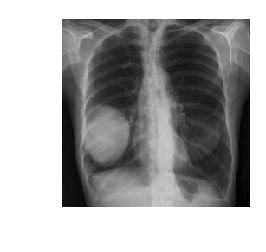

In [17]:
# read image and show
img = cv2.imread('test/2.png') # in BGR mode
# convert to RGB mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

Threshold limit: 158.0


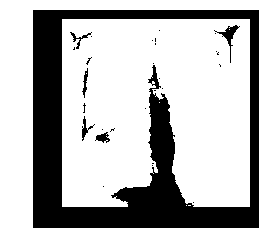

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

In [19]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

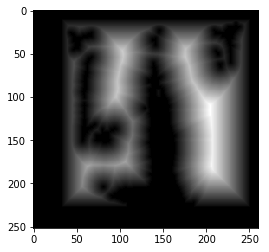

In [20]:
plt.imshow(dist_transform, cmap = 'gray')

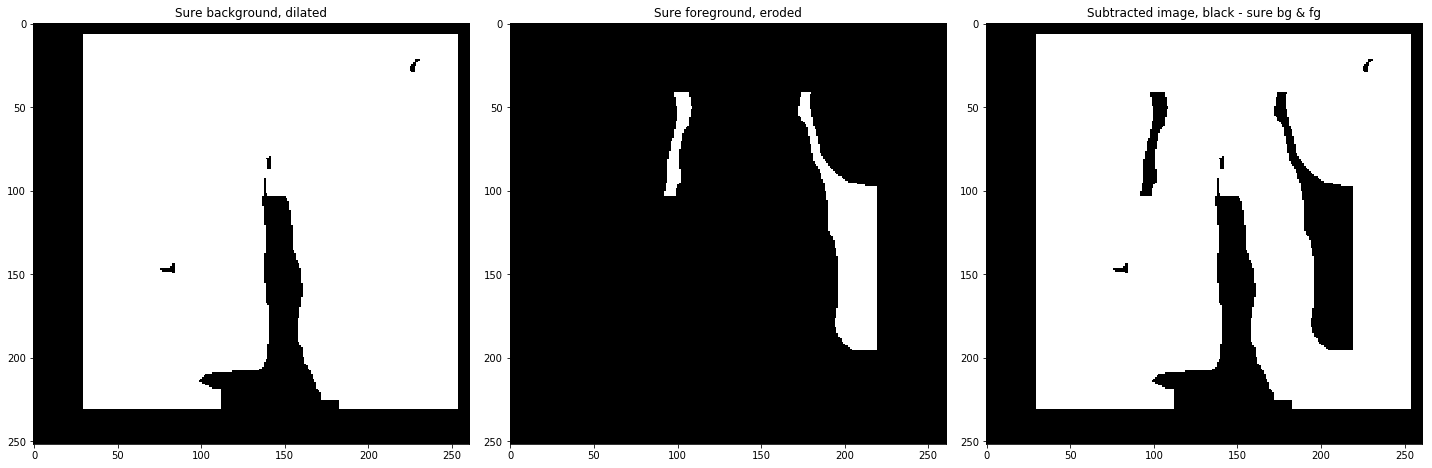

In [21]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

# plt.subplots_adjust(wspace = 3)
# fine tuning 
# f.subplots_adjust(wspace=3)

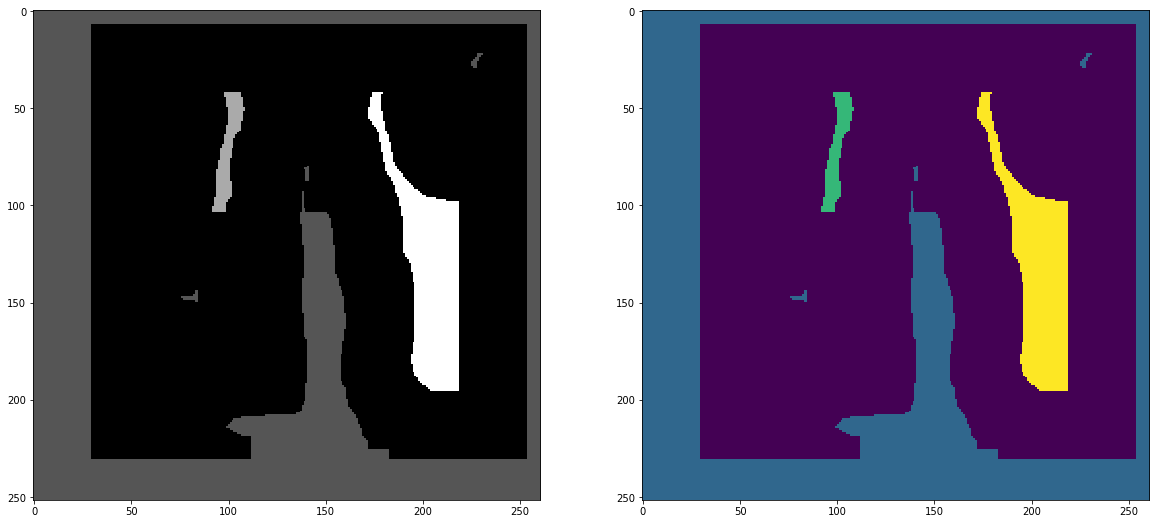

In [22]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

In [23]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255,0]

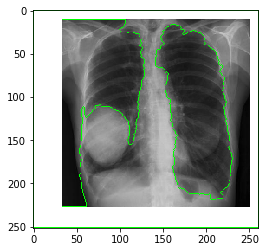

In [24]:
plt.imshow(img)